In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)

   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
  

In [2]:
data = sns.load_dataset('titanic')
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [3]:
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
target = "survived"

In [5]:
df = data[features + [target]].copy().dropna()

In [7]:
X = df[features]
y = df[target]

In [8]:
X.shape, y.shape

((712, 7), (712,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [16]:
numeric_features = ["age", "sibsp", "parch", "fare"]
categorical_features = ["pclass", "sex", "embarked"]

In [17]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [18]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [21]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6853146853146853

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.73        80
           1       0.67      0.57      0.62        63

    accuracy                           0.69       143
   macro avg       0.68      0.67      0.67       143
weighted avg       0.68      0.69      0.68       143

[[62 18]
 [27 36]]


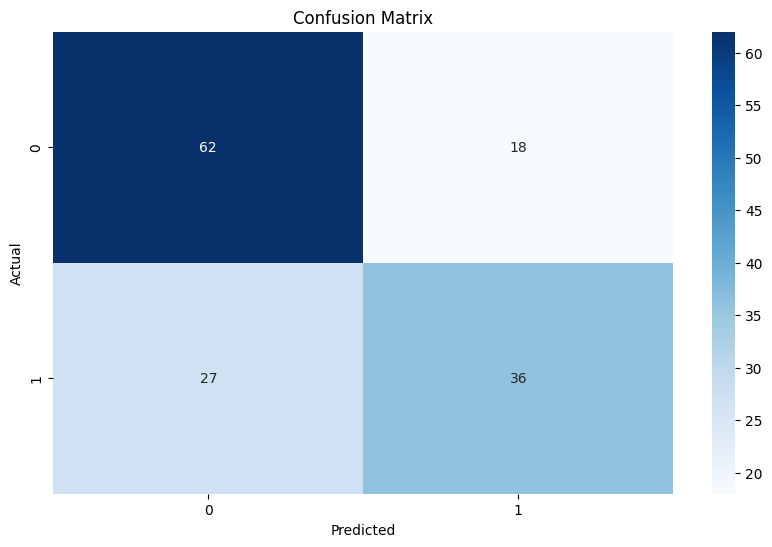

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [25]:
grid = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5}

In [26]:
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.7202797202797203